# Regression model diagnostics plots example

Fit a LightGBM regression model to the Boston house-prices dataset and generate diagnostic plots for the test data using plotnine.

The plots are those often used for classical linear regression models (with their associated assumptions about normally distributed residuals and homoscedasticity). While other regression models do not have these explicit assumptions, there is still value in examining the distribution of residuals.

In [3]:
import lightgbm as lgb
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

from regression_diagnostics import RegressionDiagnostics

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the boston house-prices dataset and fit a regression model
california = fetch_california_housing()

X_raw = pd.DataFrame(california["data"], columns=california.feature_names)
y_raw = california.target

X = X_raw.loc[y_raw < 5, :]
y = y_raw[y_raw < 5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)

# Generate diagnostic plots
diagnostics = RegressionDiagnostics(lgb_model)
diagnostics.fit(X_test, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 15718, number of used features: 8
[LightGBM] [Info] Start training from score 1.920532


RegressionDiagnostics(model=LGBMRegressor())

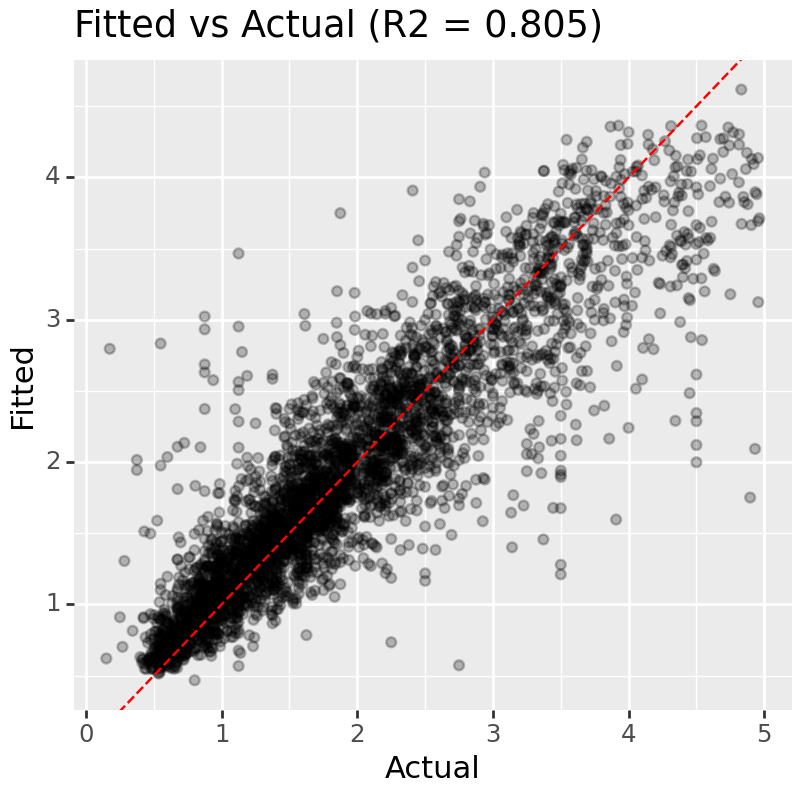

<Figure Size: (400 x 400)>

In [6]:
# Fitted values against actual values
diagnostics.fitted_actual()

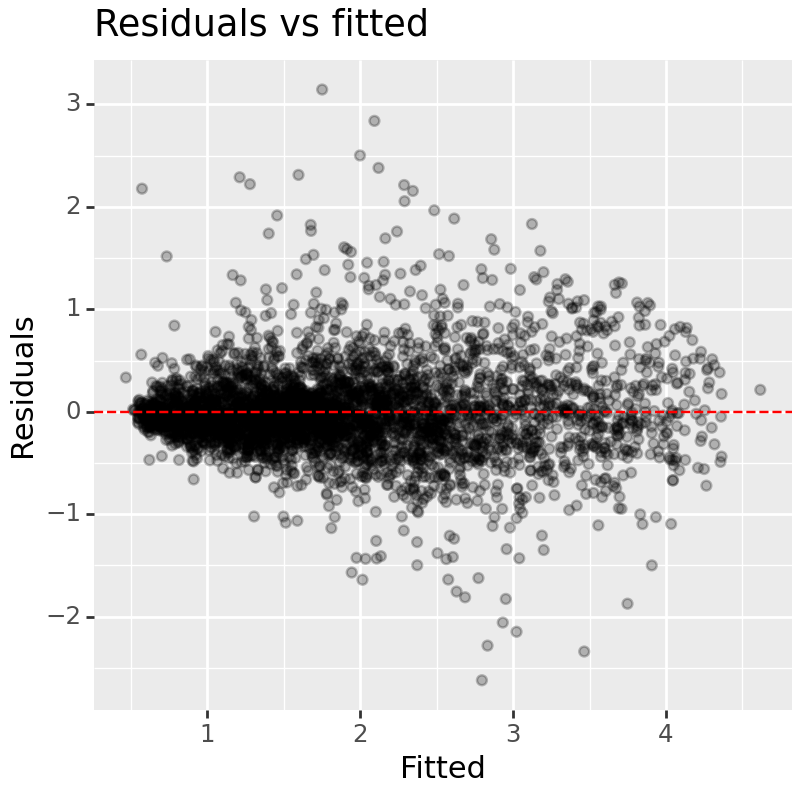

<Figure Size: (400 x 400)>

In [7]:
# Residuals against fitted values
diagnostics.residuals_fitted()

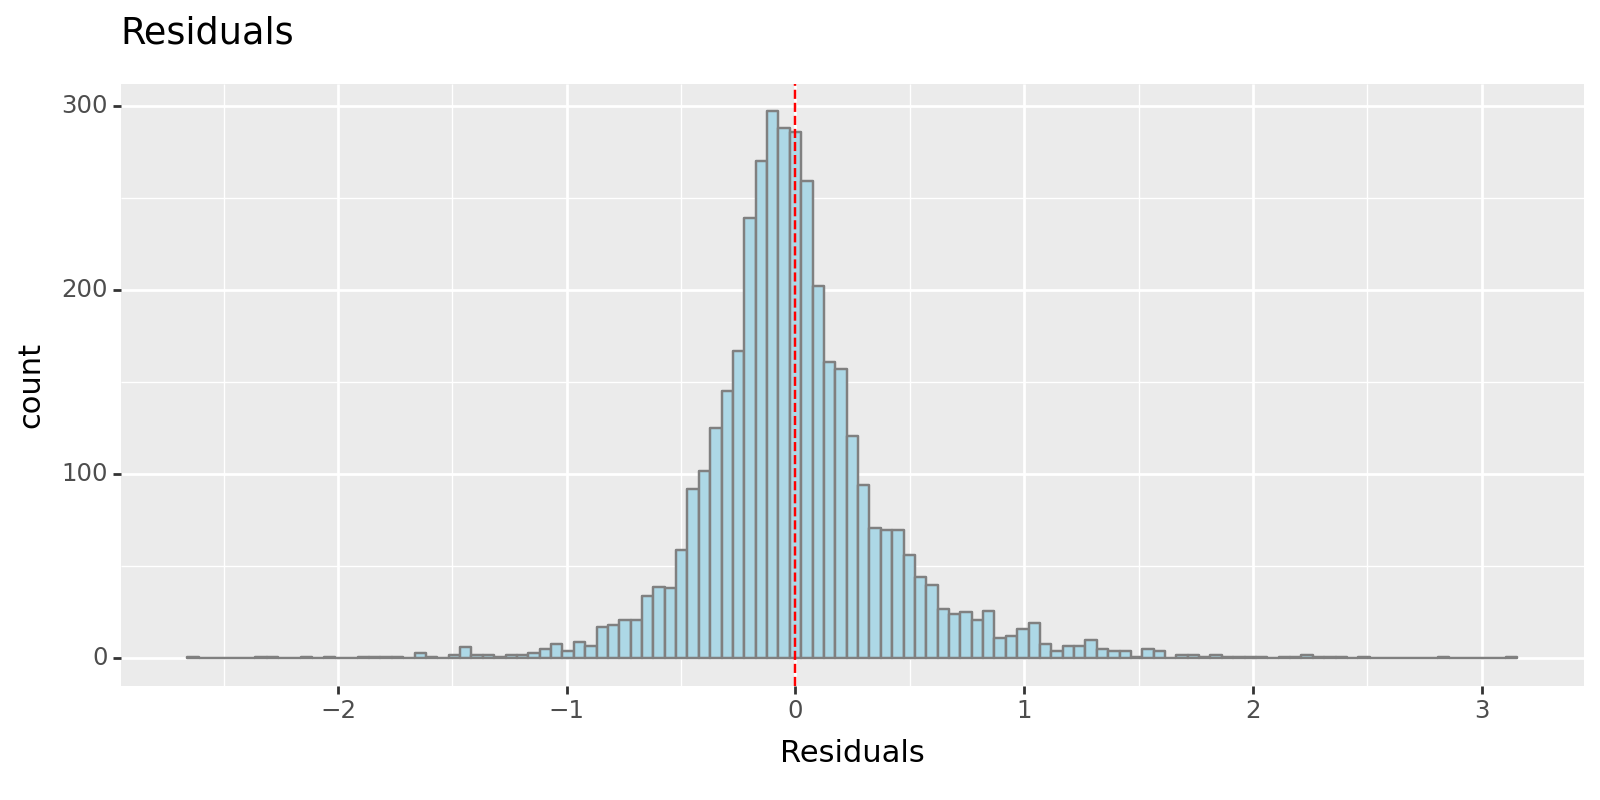

<Figure Size: (800 x 400)>

In [8]:
# Histogram of residuals
diagnostics.hist_residuals()

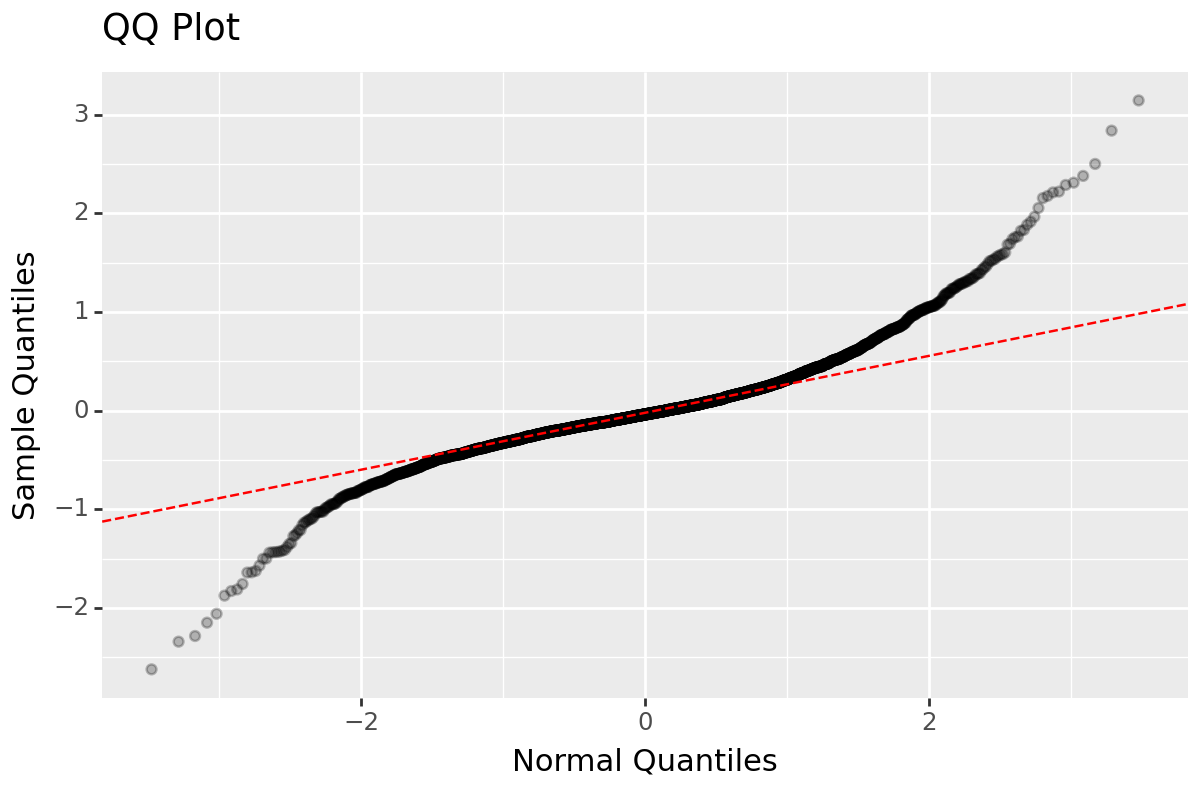

<Figure Size: (600 x 400)>

In [9]:
# QQ plot of residuals
diagnostics.qq_plot()